In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\multi linear regression\\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data['State']=data['State'].astype('category')

In [7]:
data.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data_1=pd.get_dummies(data=data,columns=['State'],drop_first=True)
data_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


<Figure size 1200x1200 with 0 Axes>

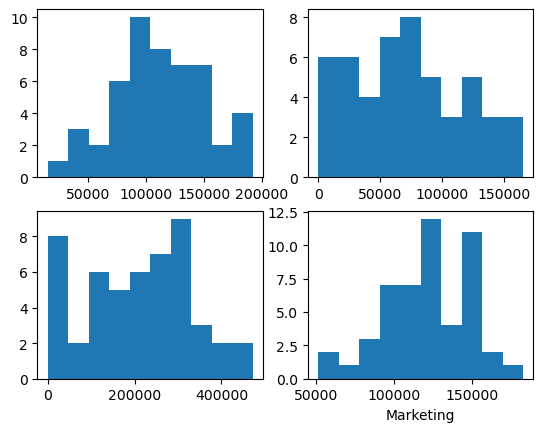

In [11]:
fig=plt.figure(figsize=(12,12))
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
fig,ax=plt.subplots(2,2)
ax[0,0].hist(data_1['Profit'])
plt.xlabel('Profit')
ax[0,1].hist(data_1['R&D Spend'])
plt.xlabel('R&D')
ax[1,1].hist(data_1['Administration'])
plt.xlabel('Administration')
ax[1,0].hist(data_1['Marketing Spend'])
plt.xlabel('Marketing')

plt.show()

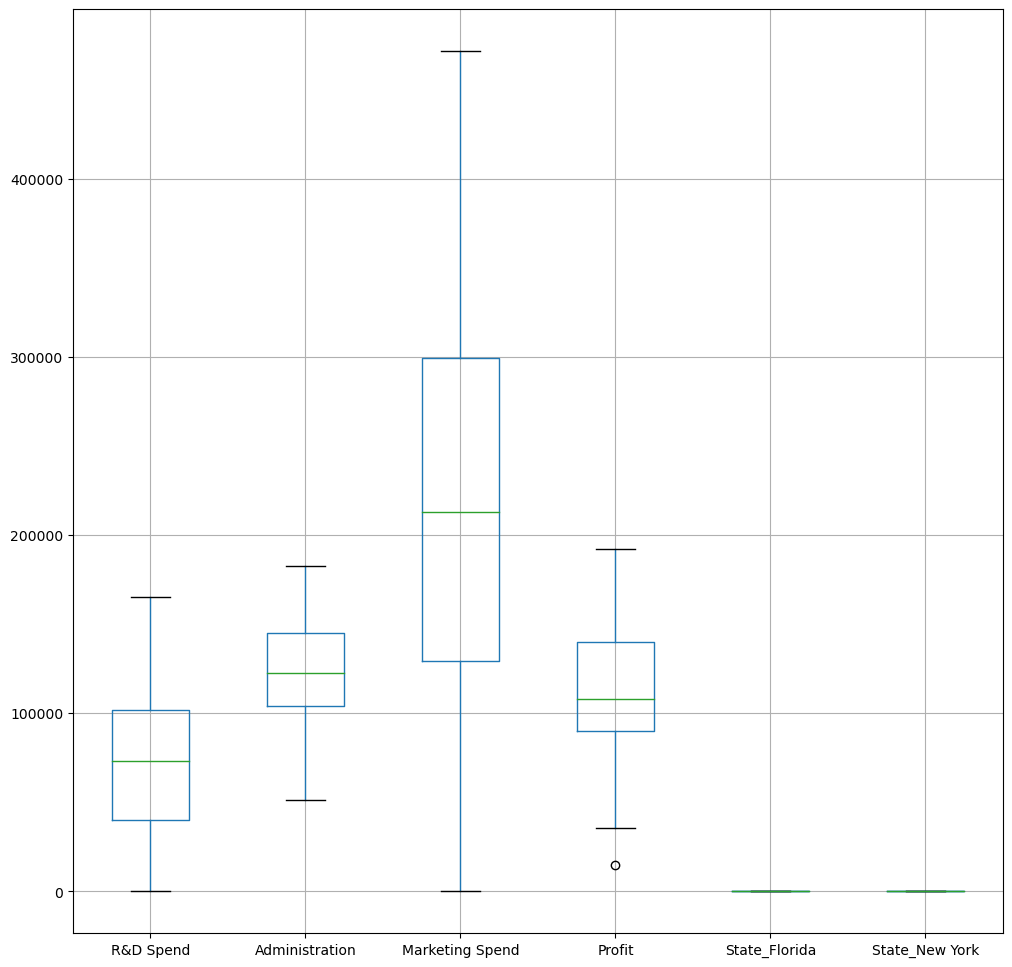

In [12]:
data_1.boxplot(figsize=(12,12))
plt.show()

# correlation analysis

In [13]:
data_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


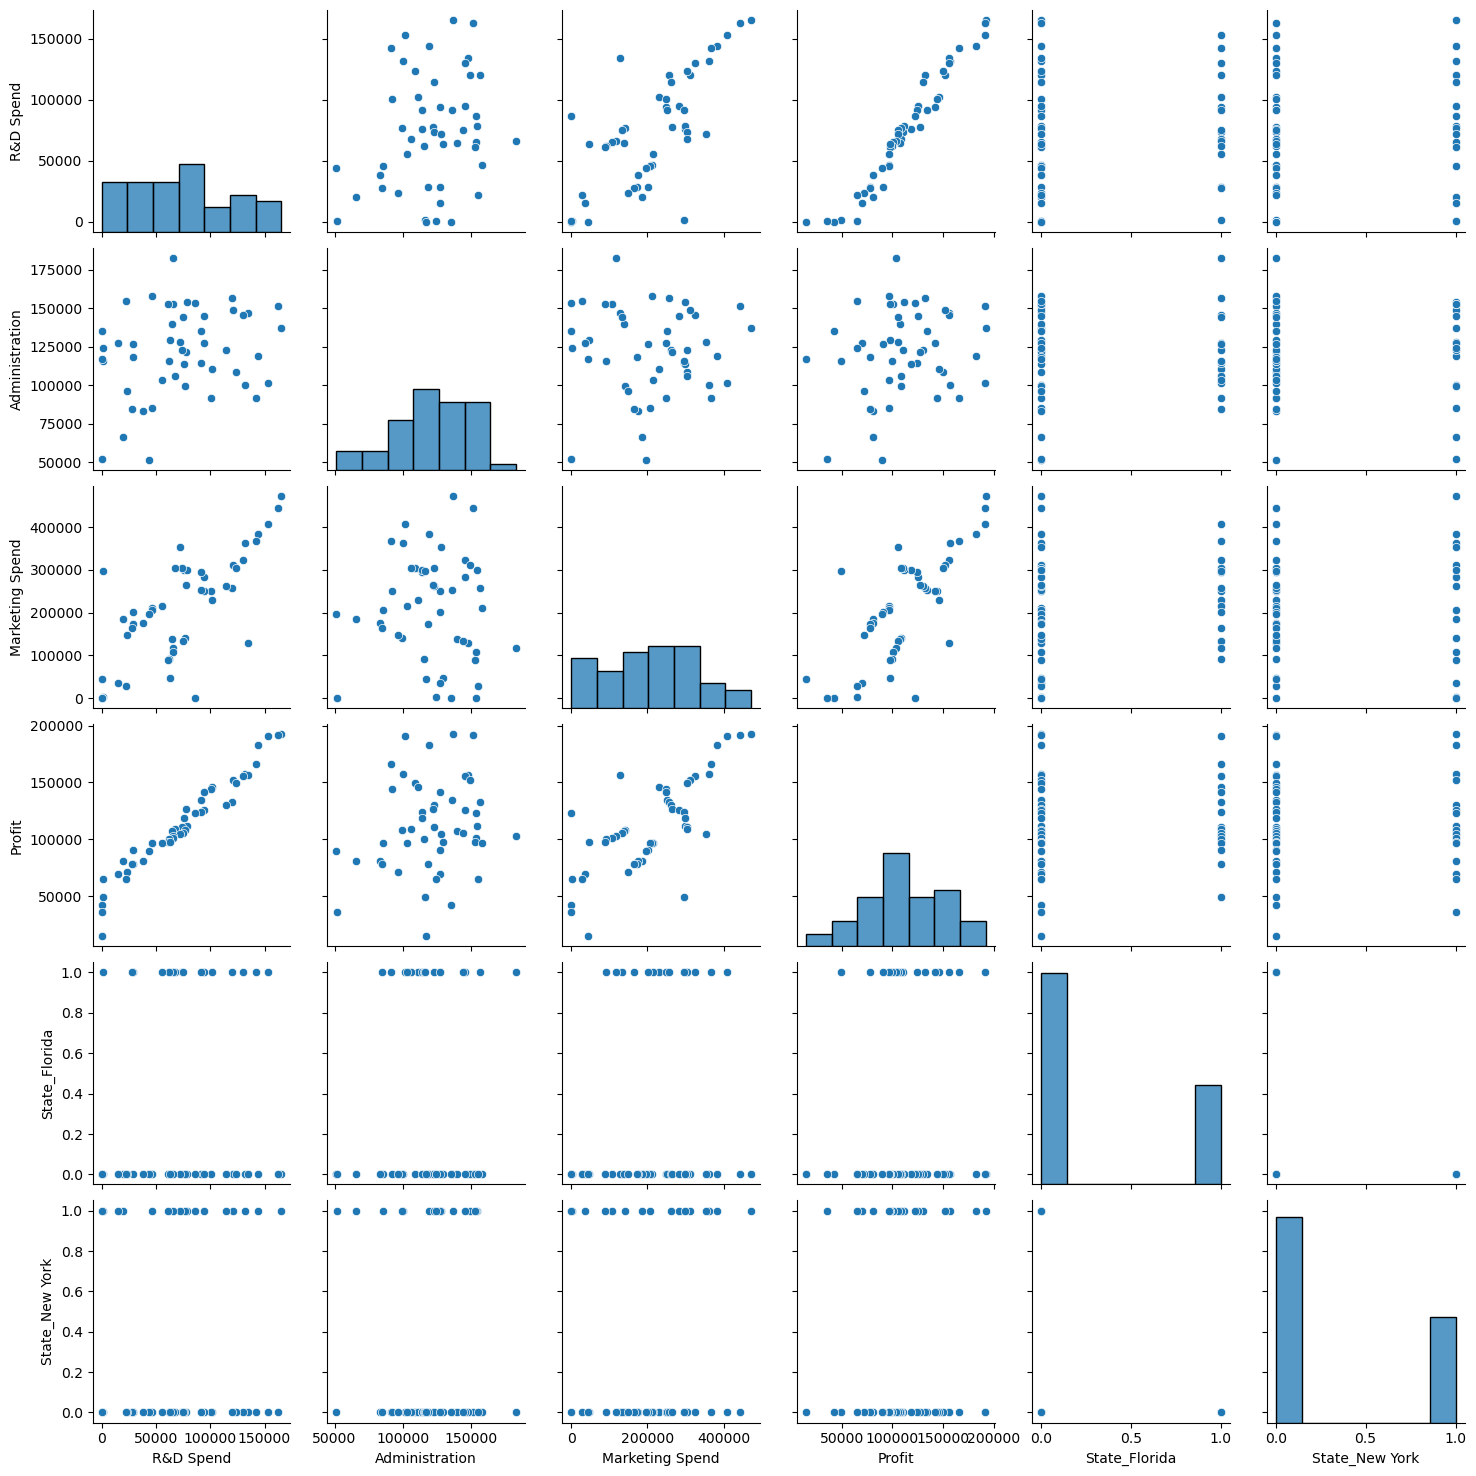

In [14]:
pairplot=sns.pairplot(data_1)

# transformations-Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [16]:
x=data_1.drop(columns=['Profit'])
y=pd.DataFrame(data_1['Profit'],columns=['Profit'])
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(x.values)
Y=scaler.fit_transform(y.values)

In [18]:
X_df=pd.DataFrame(X,columns=['RD','Adm','Mktg','F','NY'])
Y_df=pd.DataFrame(Y,columns=['Profit'])

In [19]:
data1=pd.DataFrame(X_df)
data1['Profit']=Y_df
data1.head()

,RD,Adm,Mktg,F,NY,Profit
0,2.016411,0.560753,2.153943,-0.685994,1.393261,2.011203
1,1.955860,1.082807,1.923600,-0.685994,-0.717741,1.999430
2,1.754364,-0.728257,1.626528,1.457738,-0.717741,1.980842
3,1.554784,-0.096365,1.422210,-0.685994,1.393261,1.776627
4,1.504937,-1.079919,1.281528,1.457738,-0.717741,1.357740


In [20]:
model=smf.ols('Profit~RD+Adm+Mktg+F+NY',data=data1).fit()

In [21]:
model.params

Intercept   -5.204170e-16
RD           9.179307e-01
Adm         -1.877136e-02
Mktg         8.185781e-02
F            2.324003e-03
NY          -4.972860e-04
dtype: float64

In [22]:
model.tvalues,model.pvalues

(Intercept   -1.555556e-14
 RD           1.736858e+01
 Adm         -5.170116e-01
 Mktg         1.573889e+00
 F            5.897015e-02
 NY          -1.286441e-02
 dtype: float64,
 Intercept    1.000000e+00
 RD           2.578772e-21
 Adm          6.077373e-01
 Mktg         1.226769e-01
 F            9.532429e-01
 NY           9.897941e-01
 dtype: float64)

In [23]:
model.rsquared

0.9507524843355148

# simple linear regression

In [24]:
ml_R=smf.ols('Profit~RD',data=data1).fit()

In [25]:
print(ml_R.tvalues,'\n',ml_R.pvalues)

Intercept   -1.559332e-14
RD           2.915114e+01
dtype: float64 
 Intercept    1.000000e+00
RD           3.500322e-32
dtype: float64


In [26]:
ml_R.rsquared

0.9465353160804392

In [27]:
ml_A=smf.ols('Profit~Adm',data=data1).fit()

In [28]:
print(ml_A.tvalues,'\n',ml_A.pvalues)

Intercept   -3.680455e-15
Adm          1.419493e+00
dtype: float64 
 Intercept    1.000000
Adm          0.162217
dtype: float64


In [29]:
ml_M=smf.ols('Profit~Mktg',data=data1).fit()

In [30]:
print(ml_M.tvalues,'\n',ml_M.pvalues)

Intercept   -5.430358e-15
Mktg         7.802657e+00
dtype: float64 
 Intercept    1.000000e+00
Mktg         4.381073e-10
dtype: float64


In [31]:
ml_F=smf.ols('Profit~F',data=data1).fit()

In [32]:
print(ml_F.tvalues,'\n',ml_F.pvalues)

Intercept   -3.630165e-15
F            8.108610e-01
dtype: float64 
 Intercept    1.000000
F            0.421448
dtype: float64


In [33]:
ml_NY=smf.ols('Profit~NY',data=data1).fit()

In [34]:
print(ml_NY.tvalues,'\n',ml_NY.pvalues)

Intercept   -3.607330e-15
NY           2.174281e-01
dtype: float64 
 Intercept    1.000000
NY           0.828796
dtype: float64


In [35]:
ml_RA=smf.ols('Profit~RD+Adm',data=data1).fit()

In [36]:
ml_RA.pvalues

Intercept    1.000000e+00
RD           2.278348e-31
Adm          2.888932e-01
dtype: float64

In [37]:
ml_RA.rsquared

0.9478129385009173

In [38]:
ml_MA=smf.ols('Profit~Mktg+Adm',data=data1).fit()

In [39]:
ml_MA.pvalues

Intercept    1.000000e+00
Mktg         9.727245e-11
Adm          1.729198e-02
dtype: float64

In [40]:
ml_MA.rsquared

0.6097229746770663

In [41]:
ml_MR=smf.ols('Profit~Mktg+RD',data=data1).fit()

In [42]:
ml_MR.pvalues

Intercept    1.000000e+00
Mktg         6.003040e-02
RD           6.040433e-24
dtype: float64

In [43]:
ml_MR.rsquared

0.9504503015559763

# Vif

In [44]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif['variable'] = X_df.columns

In [46]:
vif

,VIF,variable
0,19.604937,RD
1,1.184921,Adm
2,2.552858,Mktg
3,1.387751,F
4,1.335066,NY
5,20.305593,Profit


#vif is less than 10,there is no collinearitty problem in independent variables

# subset selction

In [47]:
model_MRA=smf.ols('Profit~Mktg+RD+Adm',data=data1).fit()

In [48]:
model_MRA.pvalues

Intercept    1.000000e+00
Mktg         1.047168e-01
RD           2.634968e-22
Adm          6.017551e-01
dtype: float64

In [49]:
model_MRA.rsquared,model_MRA.aic

(0.9507459940683246, -0.6443754774143002)

In [50]:
model_MRAF=smf.ols('Profit~Mktg+RD+Adm+F',data=data1).fit()

In [51]:
model_MRAF.pvalues

Intercept    1.000000e+00
Mktg         1.184614e-01
RD           8.293975e-22
Adm          6.037292e-01
F            9.398330e-01
dtype: float64

In [52]:
model_MRAF.rsquared,model_MRAF.aic

(0.9507522991055133, 1.349223580510241)

In [53]:
model_MRAFN=smf.ols('Profit~Mktg+RD+Adm+F+NY',data=data1).fit()

In [54]:
model_MRAFN.rsquared,model_MRAFN.aic

(0.9507524843355148, 3.349035520614521)

In [55]:
model_MRAFN.pvalues

Intercept    1.000000e+00
Mktg         1.226769e-01
RD           2.578772e-21
Adm          6.077373e-01
F            9.532429e-01
NY           9.897941e-01
dtype: float64

#aic for model with R&D,Adminstration,Mktg have less aic and high accuracy

# storing the predicted values in dataframe

In [56]:
model_MRA=smf.ols('Profit~Mktg+RD+Adm',data=data1).fit()

In [57]:
Y_pred=pd.DataFrame(Y,columns=['Profit'])
Y_pred['predicted']=model_MRA.fittedvalues
Y_pred['Error/resid']=model_MRA.resid
Y_pred['Error.sqrd']=(model_MRA.resid)**2
Y_pred.head()

,Profit,predicted,Error/resid,Error.sqrd
0,2.011203,2.017705,-0.006502,0.000042
1,1.999430,1.933384,0.066046,0.004362
2,1.980842,1.757713,0.223130,0.049787
3,1.776627,1.545924,0.230703,0.053224
4,1.357740,1.506898,-0.149158,0.022248


# residual analysis

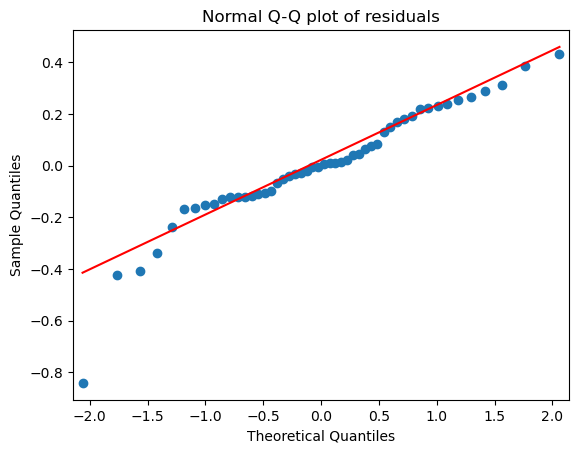

In [62]:
sm.qqplot(model_MRA.resid,line='q')
qqplot=plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [63]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

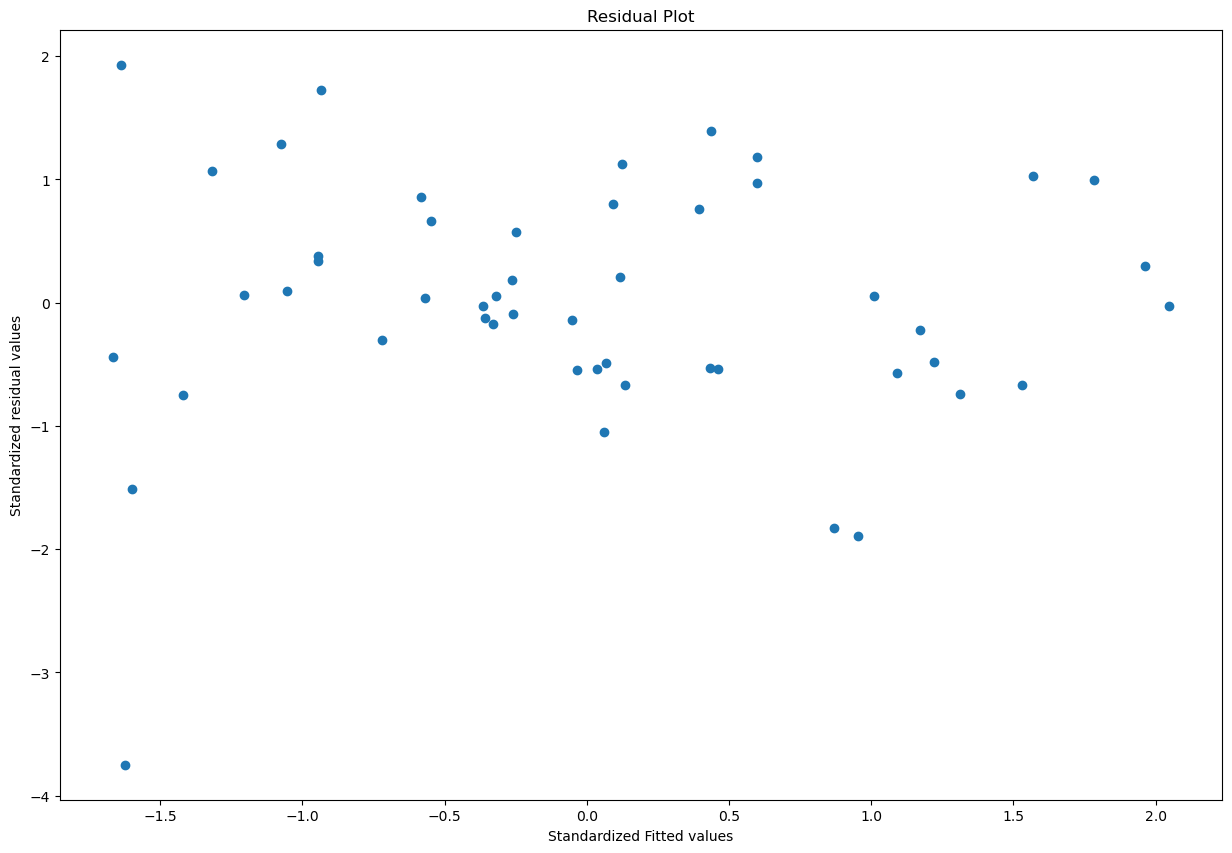

In [64]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(get_standardized_values(model_MRA.fittedvalues),
            get_standardized_values(model_MRA.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [65]:
# From above plot it is clear there is no pattern between predicted and residual values 

# residual vs regressorss

eval_env: 1


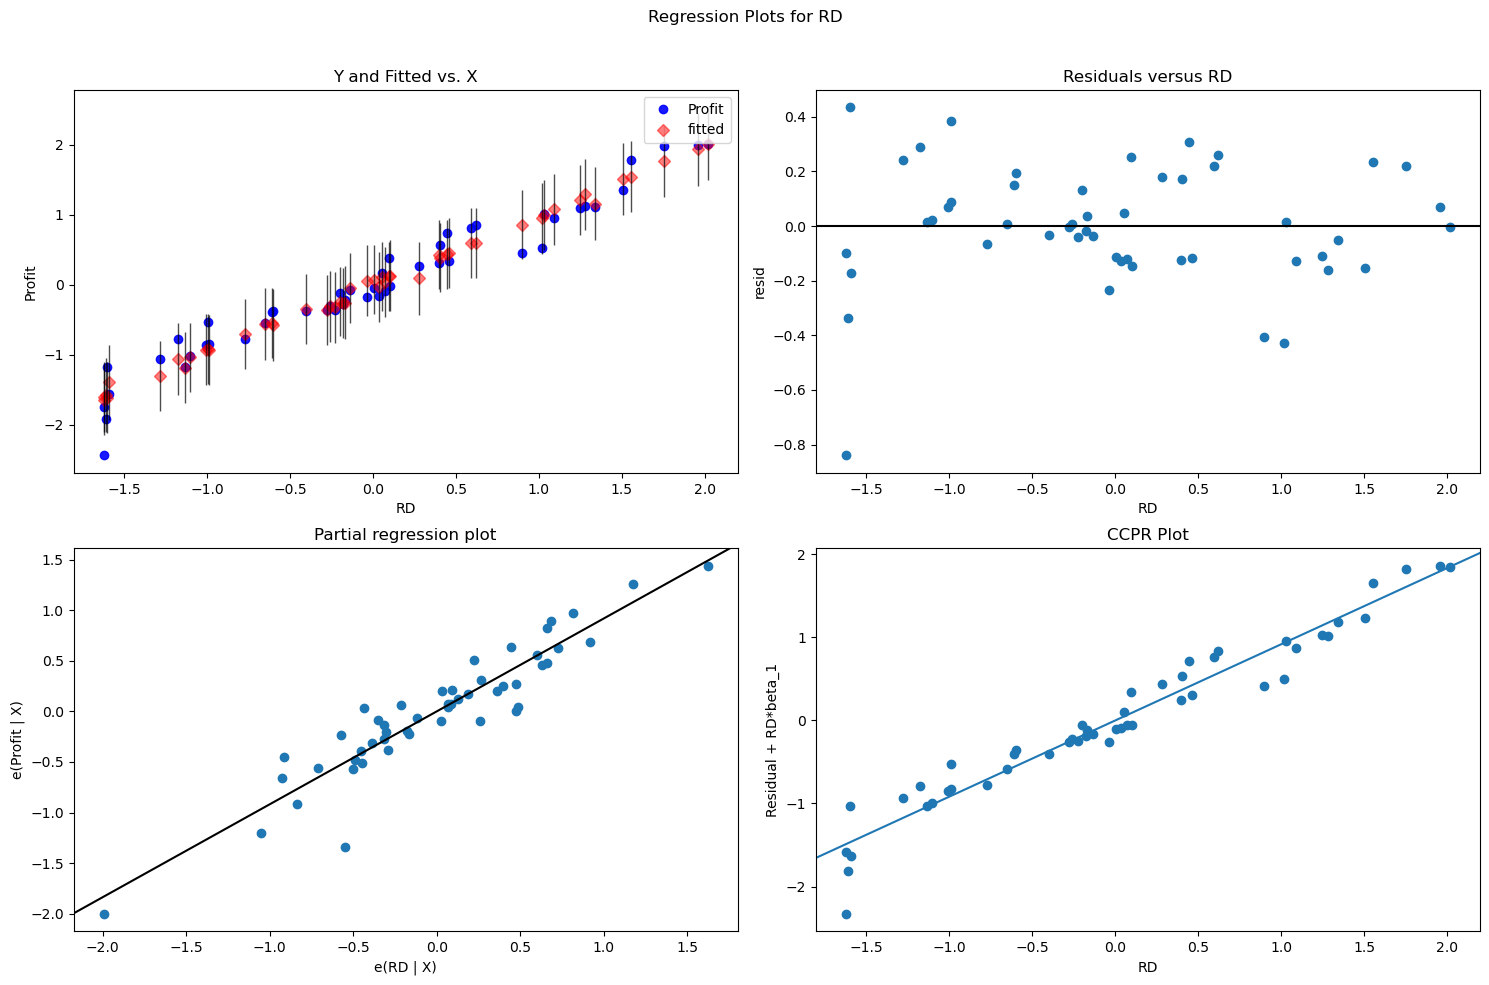

In [66]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

eval_env: 1


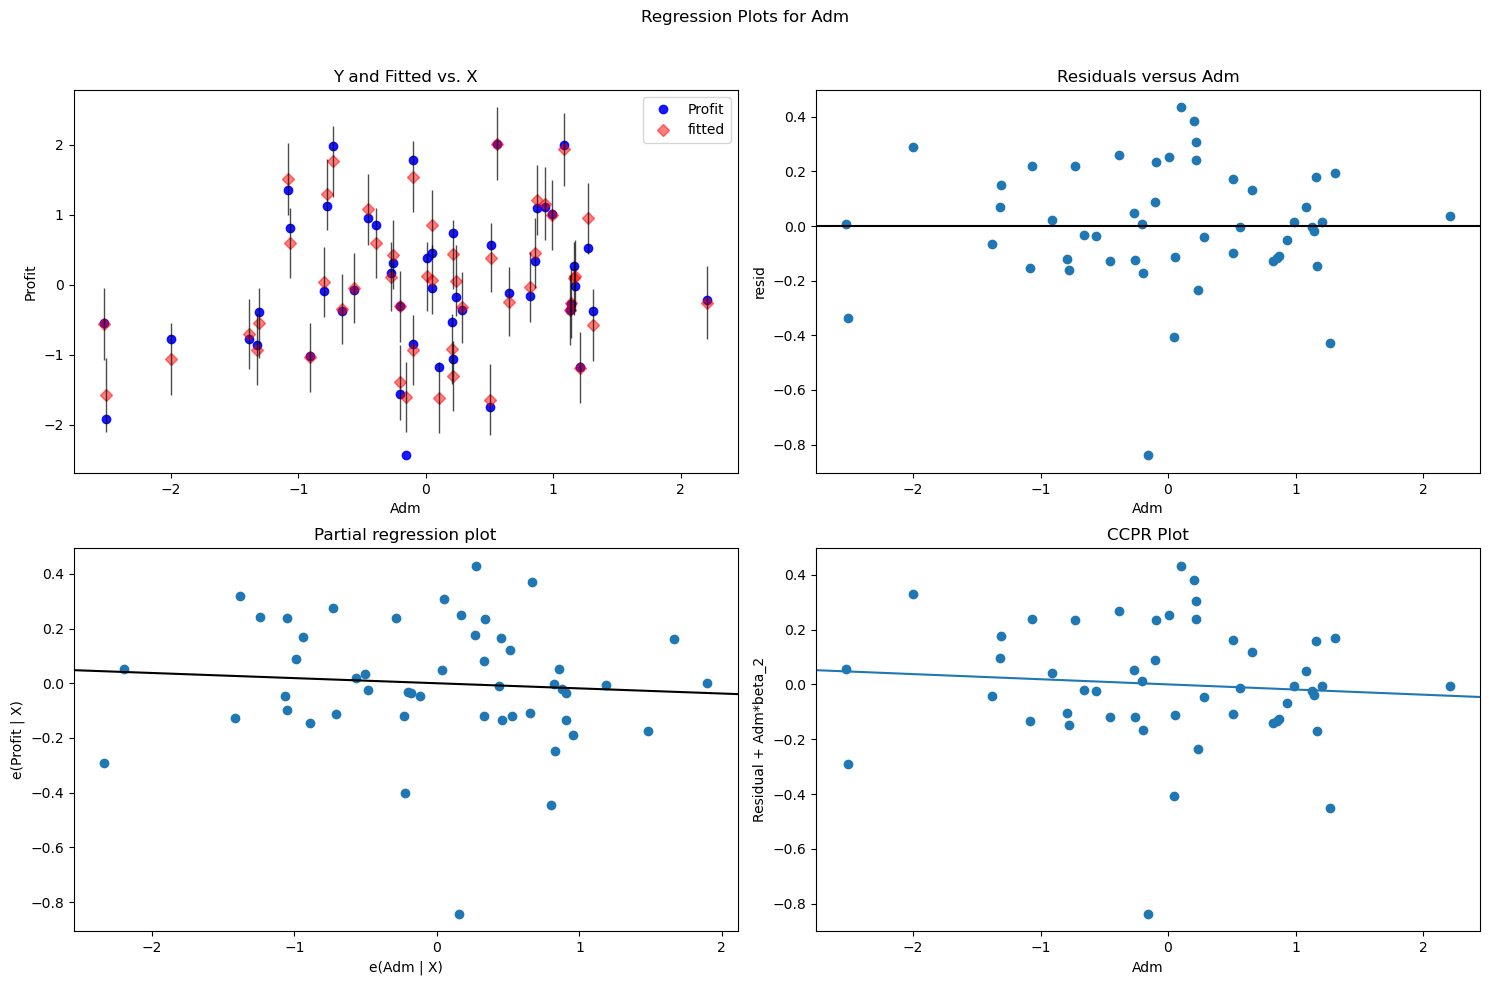

In [67]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Adm", fig=fig)
plt.show()

eval_env: 1


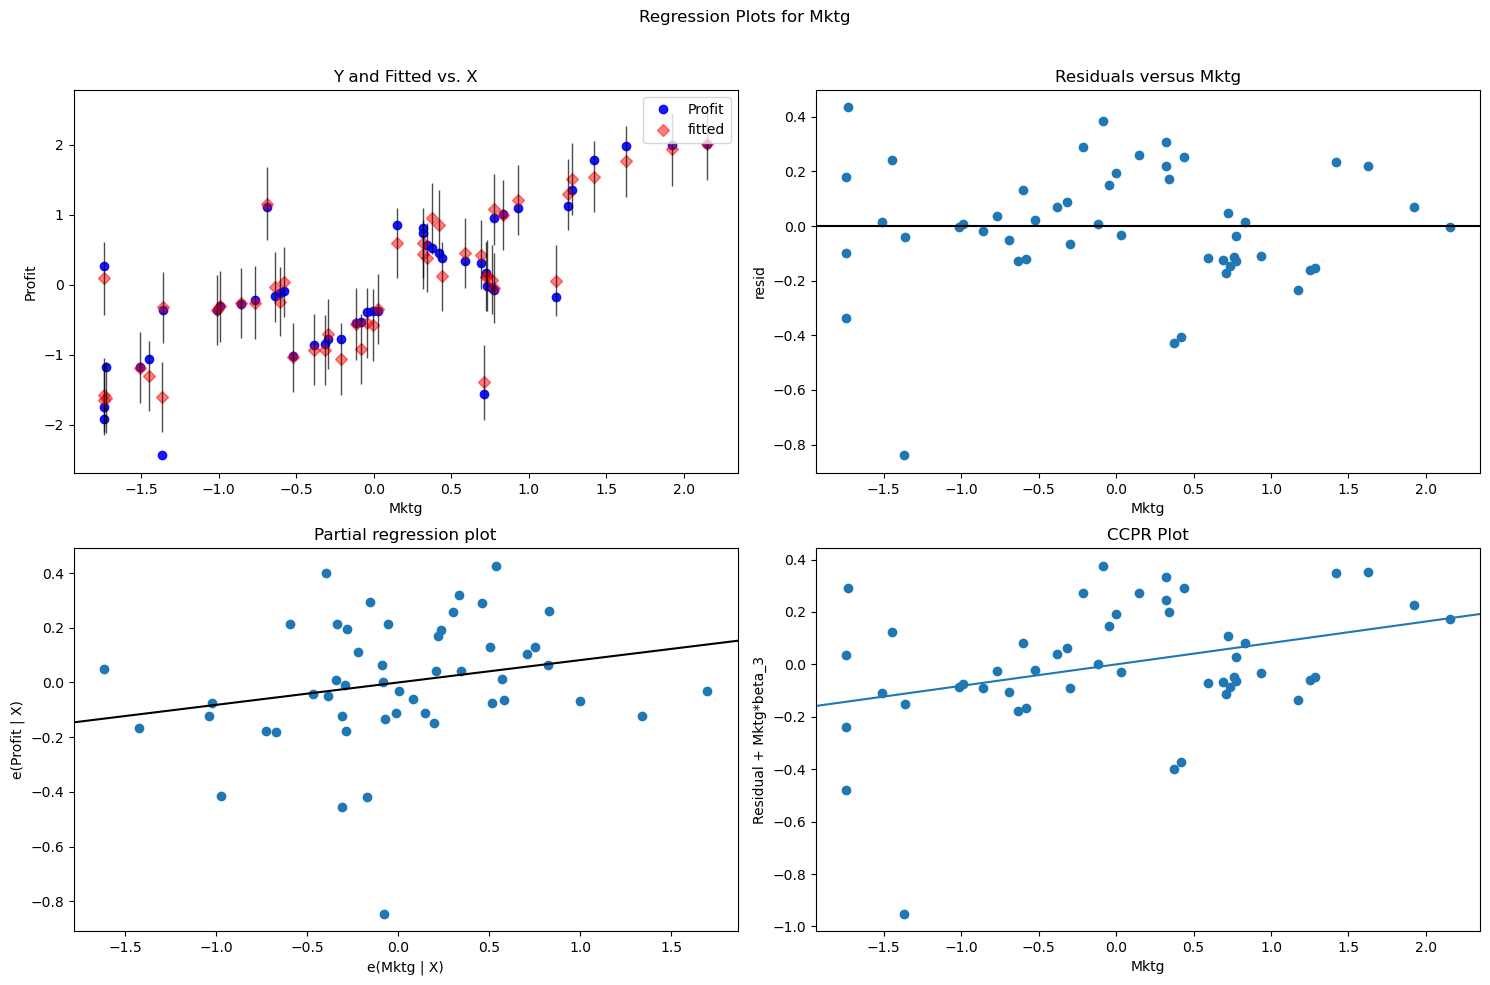

In [68]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Mktg", fig=fig)
plt.show()

# outliers detection

In [69]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model_MRA.get_influence()
(c, _) = model_influence.cooks_distance

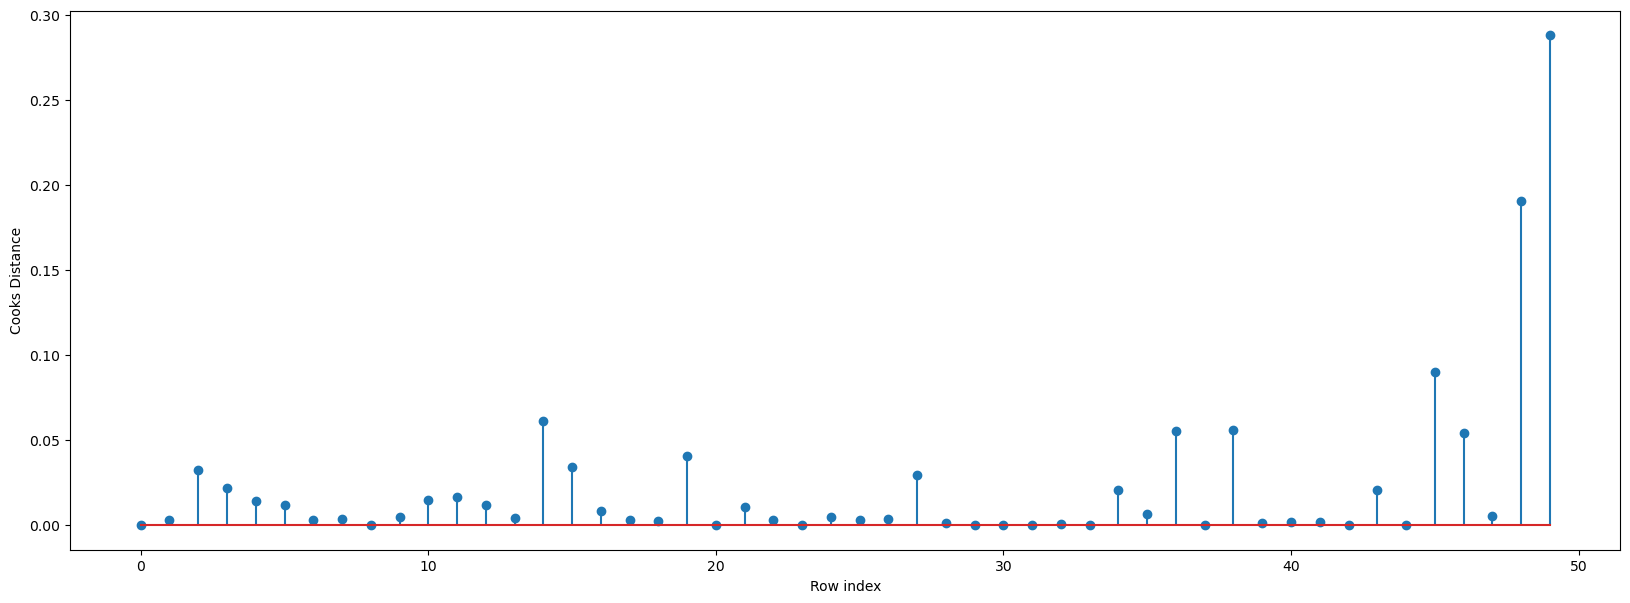

In [70]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 4))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [72]:
# leverage point

In [73]:
data1.shape

(50, 6)

In [74]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42000000000000004

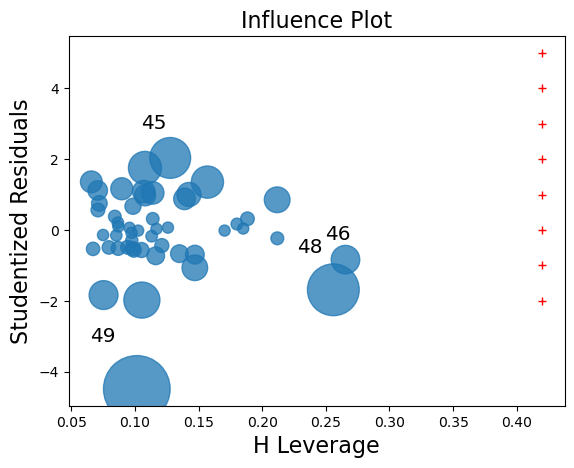

In [75]:
influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,6)]
x=[leverage_cutoff for i in range(8)]
leverageplot1=plt.plot(x,y,'r+')

plt.show()

In [76]:
data1[data1.index.isin([49])]

,RD,Adm,Mktg,F,NY,Profit
49,-1.622362,-0.157226,-1.369985,-0.685994,-0.717741,-2.439313


In [77]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index()

In [78]:
data2=data2.drop(['index'],axis=1)

In [79]:
data2.shape

(49, 6)

In [80]:
model2=smf.ols("Profit~RD+Adm+Mktg",data=data2).fit()
(c,_)=model2.get_influence().cooks_distance
c
np.argmax(c) , np.max(c)
data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
data2.shape

(48, 6)

In [81]:
final_model=smf.ols("Profit~RD+Adm+Mktg",data=data2).fit()
final_model.rsquared , final_model.aic
print("model accuracy is improved to",final_model.rsquared)

model accuracy is improved to 0.9626766170294073


In [99]:
data2.head()

,RD,Adm,Mktg,F,NY,Profit
0,2.016411,0.560753,2.153943,-0.685994,1.393261,2.011203
1,1.955860,1.082807,1.923600,-0.685994,-0.717741,1.999430
2,1.754364,-0.728257,1.626528,1.457738,-0.717741,1.980842
3,1.554784,-0.096365,1.422210,-0.685994,1.393261,1.776627
4,1.504937,-1.079919,1.281528,1.457738,-0.717741,1.357740


In [106]:
Y_pred=final_model.predict(data2)

In [103]:
final_df=pd.DataFrame(data2['Profit'])


In [104]:
final_df['Predicted']=final_model.predict(data2)
final_df.shape

(48, 2)

In [95]:
inverse=scaler.inverse_transform(final_df)

In [96]:
predictions=pd.DataFrame(inverse,columns=['Actual_Profit','Predicted_profit'])

In [97]:
predictions.head()

,Actual_Profit,Predicted_profit
0,192261.83,188939.277484
1,191792.06,185378.579127
2,191050.39,180724.354190
3,182901.99,172036.176973
4,166187.94,171688.341312


In [98]:
df={'Prep_Models':['Model','Final_Model'],'Rsquared':[model_MRA.rsquared,final_model.rsquared]}
table=pd.DataFrame(df)
print('FINAL MODEL :-')
table

FINAL MODEL :-


,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.962677
